# K-Means Clustering

## Importing the libraries

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [27]:
dataset = pd.read_csv('Mall_Customers.csv')
print(dataset.head())
# customers id doesn't have any impact on patterns
# only took 2 values for visualization purposes
X = dataset.iloc[:, [3, 4]].values

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


## Using the elbow method to find the optimal number of clusters

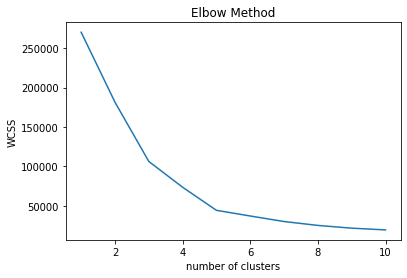

In [28]:
from sklearn.cluster import KMeans
# run the kMeans alg with i clusters
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)
  #inertia is the wcss value of the model
  wcss.append(kmeans.inertia_)
plt.plot( range(1, 11), wcss)
plt.title('Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('number of clusters')
plt.show()
# looks like we 5 clusters is the ideal

## Training the K-Means model on the dataset

In [29]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
# we now created classes which are dependent values based on features
y_means = kmeans.fit_predict(X)
print(y_means)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


## Visualising the clusters

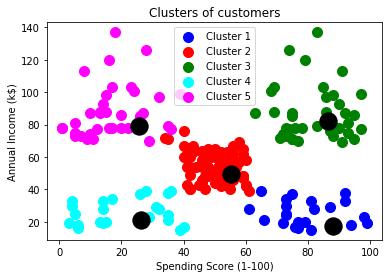

In [44]:
# X[y_means==0] means rows of X for which y_means of corresponding row is 0
# scatter of icome vs credit score
plt.scatter(X[y_means==0, 1], X[y_means==0, 0], c='blue', label='Cluster 1', s = 100)
plt.scatter(X[y_means==1, 1], X[y_means==1, 0], c='red', label='Cluster 2', s = 100)
plt.scatter(X[y_means==2, 1], X[y_means==2, 0], c='green', label='Cluster 3', s = 100)
plt.scatter(X[y_means==3, 1], X[y_means==3, 0], c='cyan', label='Cluster 4', s = 100)
plt.scatter(X[y_means==4, 1], X[y_means==4, 0], c='magenta', label='Cluster 5', s = 100)

# plot the centroids
# clusters_centers_ is 2d array with each entry being [x_center, y_center]
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black')
plt.title('Clusters of customers')
plt.ylabel('Annual Income (k$)')
plt.xlabel('Spending Score (1-100)')
plt.legend()
plt.show()
# we can see some data points are similar

We can intepret the clusters as the following:
- Cluster 1: People with low income, but who still spend a lot of money
- Cluster 2: The average customers, with average income and average spending score
- Cluster 3: People with  high income, but who spend a lot
- Cluster 4: People with low income, so they spend less
- Cluster 5: People with high income but who don't spend much  
So if there if we were to use this customer data to incrase sales, we could target customers of cluster 4 when a new product releases

TODO: do cluster with age and gender data included